In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

X = load_breast_cancer().data
Y = load_breast_cancer().target

In [3]:
X.shape

(569, 30)

In [1]:
# 简单的尝试使用l1, l2

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split

In [42]:
# 实例化模型, 不切分数据集的情况

lrl1 = LR(penalty = 'l1',
          solver = 'liblinear',
          C = 0.5, max_iter = 1000
         ).fit(X, Y)


lrl2 = LR(penalty = 'l2',
          solver = 'lbfgs',
          C = 0.5, max_iter = 5000
         ).fit(X, Y)
lrl1.score(X, Y), lrl2.score(X, Y)

# 看C变大，分数是如何改变的
# C越大，描述的是越小的惩罚

(0.9578207381370826, 0.9578207381370826)

In [45]:
# 切分数据集，查看模型是否过拟合

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 420)

In [55]:
C = 1
lrl1 = LR(penalty = 'l1',
          solver = 'liblinear',
          C = C, max_iter = 1000
         ).fit(Xtrain, Ytrain)


lrl2 = LR(penalty = 'l2',
          solver = 'lbfgs',
          C = C, max_iter = 500000
         ).fit(Xtrain, Ytrain)

print(lrl1.score(Xtrain, Ytrain), lrl1.score(Xtest, Ytest))
print(lrl2.score(Xtrain, Ytrain), lrl2.score(Xtest, Ytest))

0.9698492462311558 0.9298245614035088
0.9673366834170855 0.9239766081871345


In [65]:
# 对参数C做学习曲线, 查看C在l1下训练集和测试集的表现，在l2下下训练集和测试集的表现
l1 = []
l2 = []

l1test = []
l2test = []
for i in np.linspace(0.05, 2, 100):
    # 实例化模型, 并且训练
    lrl1 = LR(penalty = 'l1',solver = 'liblinear',C = i, max_iter = 1000).fit(Xtrain, Ytrain)
    lrl2 = LR(penalty = 'l2',solver = 'liblinear',C = i, max_iter = 1000).fit(Xtrain, Ytrain)
    
    # 记录训练集的分数
    l1.append(lrl1.score(Xtrain, Ytrain))
    l2.append(lrl2.score(Xtrain, Ytrain))
    
    # 记录测试集的分数
    l1test.append(lrl1.score(Xtest, Ytest))
    l2test.append(lrl2.score(Xtest, Ytest))

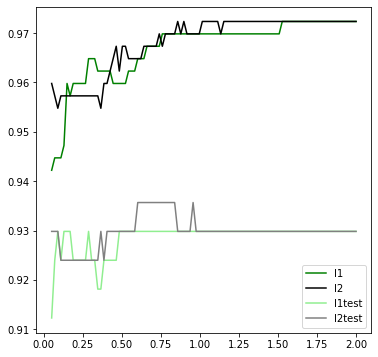

In [66]:
graph = [l1, l2, l1test, l2test]
color = ['green', 'black', 'lightgreen', 'gray']
label = ['l1', 'l2', 'l1test', 'l2test']

plt.figure(figsize = (6,6))
for i in range(4):
    plt.plot(np.linspace(0.05, 2, 100), graph[i], color[i], label = label[i])
plt.legend(loc=4)
plt.show()

In [1]:
#选取测试和训练集合差距小的参数c

/Users/xiangyangni/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/xiangyangni/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/xiangyangni/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


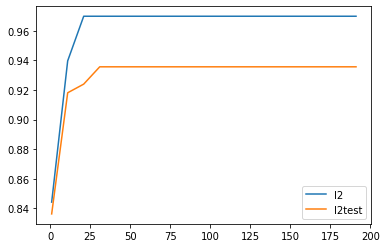

In [78]:
# C = 0.8, 调整最大的迭代次数这个参数
l2 = []
l2test = []

for i in range(1, 201, 10):
    lrl2 = LR(penalty = 'l2',solver = 'liblinear', C = 0.8, max_iter = i).fit(Xtrain, Ytrain)
    l2.append(lrl2.score(Xtrain, Ytrain))
    l2test.append(lrl2.score(Xtest, Ytest))

plt.plot(range(1, 201, 10), l2, label = 'l2')
plt.plot(range(1, 201, 10), l2test, label = 'l2test')
plt.legend(loc = 4)

In [85]:
# 多分类
from sklearn.datasets import load_iris
X = load_iris().data
Y = load_iris().target

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 420)

clf = LR(solver = 'sag', multi_class = 'ovr', max_iter = 5000).fit(Xtrain, Ytrain)
clf.score(Xtrain, Ytrain), clf.score(Xtest, Ytest)

clf = LR(solver = 'sag', 
         penalty = 'l2',
         C = 0.4,
         multi_class = 'multinomial', 
         max_iter = 5000).fit(Xtrain, Ytrain)
clf.score(Xtrain, Ytrain), clf.score(Xtest, Ytest)

In [4]:
# 需要导入包和数据集，尝试网格搜索

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = load_breast_cancer().data
Y = load_breast_cancer().target

In [11]:
data = pd.DataFrame(X, columns = load_breast_cancer().feature_names)
data['label'] = Y
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [37]:
# 开始做标准化

# 首先来切分数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3)

# 使用标准化包，对训练集来学习，从而对训练集和测试集来做标准化
std = StandardScaler().fit(Xtrain)
Xtrain_ = std.transform(Xtrain)
Xtest_ = std.transform(Xtest)

In [38]:
# 在确定l2范式的情况下，判断solver, C的最优组合
p = {'C' : list(range(1, 8)),
     'solver' : ['liblinear', 'sag', 'newton-cg', 'lbfgs']
    }
model = LogisticRegression(penalty = 'l2', max_iter = 10000)
GS = GridSearchCV(model, p, cv = 5)
GS.fit(Xtrain_, Ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7],
                         'solver': ['liblinear', 'sag', 'newton-cg', 'lbfgs']})

In [39]:
GS.best_score_, GS.best_params_

(0.9749683544303795, {'C': 1, 'solver': 'liblinear'})

In [40]:
# 将最优的结果重新用来实例化模型，查看训练集和测试集下的分数

model = LogisticRegression(penalty = 'l2', 
                           max_iter = 10000,
                           C = GS.best_params_['C'],
                           solver = GS.best_params_['solver']
                          ).fit(Xtrain_, Ytrain)
model.score(Xtrain_, Ytrain), model.score(Xtest_, Ytest) 

(0.9874371859296482, 0.9824561403508771)

In [41]:
# 从上面的结果当中，发现多次尝试后，liblinear的效果的最好的。
# 是否可以尝试确定liblinear，观测l1好还是l2好

In [128]:
# 开始做标准化

# 首先来切分数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3)

# 使用标准化包，对训练集来学习，从而对训练集和测试集来做标准化
std = StandardScaler().fit(Xtrain)
Xtrain_ = std.transform(Xtrain)
Xtest_ = std.transform(Xtest)

In [129]:
p = {'C' : list(range(1,10)),
     'penalty' : ['l1', 'l2']
    }
model = LogisticRegression(solver = 'liblinear', max_iter = 10000)
GS = GridSearchCV(model, p, cv = 5)
GS.fit(Xtrain_, Ytrain)
GS.best_score_, GS.best_params_

(0.9698417721518988, {'C': 1, 'penalty': 'l1'})

In [130]:
# 将最优的结果重新用来实例化模型，查看训练集和测试集下的分数

model = LogisticRegression(penalty = GS.best_params_['penalty'], 
                           max_iter = 10000,
                           C = GS.best_params_['C'],
                           solver = 'liblinear'
                          ).fit(Xtrain_, Ytrain)
model.score(Xtrain_, Ytrain), model.score(Xtest_, Ytest) 

(0.9849246231155779, 0.9707602339181286)

In [131]:
# 得出的结果是，l1和l2的效果差不多，得出的分数也差不多。C = 1是最好
# 应该选谁？应该优先选择l1范式，因为l1的特点是直接能将大多数的变成0，使得模型更加的简单，在其它的未知的数据集上面表现的就更加好
model.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.17526968,  0.        , -1.39028524,  0.        ,  0.        ,
        -0.95554291,  0.        ,  0.        , -2.2393666 , -0.04018748,
         0.32057536,  0.        ,  0.        ,  0.        ,  0.4169557 ,
         0.        , -1.49403518,  0.        , -3.11300344, -0.53568098,
         0.        , -0.78713147, -1.55909619,  0.        ,  0.        ]])

In [136]:
# 计算召回率，AUC
from sklearn.metrics import roc_auc_score, recall_score

Ytest_pred = model.predict(Xtest_)
recall_score(Ytest_pred, Ytest), roc_auc_score(Ytest_pred, Ytest)

(0.963302752293578, 0.9735868600177567)

In [142]:
# predprob

# np.around(model.predict_proba(Xtest_), 2)

In [ ]:
# 多分类网格搜索

In [245]:
iris = load_iris()
X = iris.data
Y = iris.target

# 开始做标准化

# 首先来切分数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3)

# 使用标准化包，对训练集来学习，从而对训练集和测试集来做标准化
std = StandardScaler().fit(Xtrain)
Xtrain_ = std.transform(Xtrain)
Xtest_ = std.transform(Xtest)

In [246]:
model = LogisticRegression(max_iter = 10000, solver = 'lbfgs', penalty = 'l2')
p = {'C' : np.logspace(-3,3,7),
     'multi_class' : ['ovr', 'multinomial']
    }
GS = GridSearchCV(model, p, cv = 5)
GS.fit(Xtrain_, Ytrain)
GS.best_score_, GS.best_params_

(0.980952380952381, {'C': 10.0, 'multi_class': 'multinomial'})

In [247]:
model = LogisticRegression(penalty = 'l2', 
                           max_iter = 10000,
                           C = GS.best_params_['C'],
                           solver = 'lbfgs', 
                           multi_class = GS.best_params_['multi_class']
                          ).fit(Xtrain_, Ytrain)
model.score(Xtrain_, Ytrain), model.score(Xtest_, Ytest)

(0.9904761904761905, 0.9555555555555556)